In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Чтение базы
massiv_fx = pd.read_csv('massiv.csv')

In [9]:
massiv_fx

,Time,Open,Close,Low,High,RSI,MFI,MACD,Stochastik
0,2145,111.843,111.828,111.797,111.871,43.65,44.199,0.1425,13.57
1,2200,111.826,111.836,111.799,111.879,43.74,43.872,0.1443,13.60
2,2215,111.835,111.950,111.814,111.971,45.00,44.942,0.1443,13.73
3,2230,111.951,112.005,111.928,112.033,45.59,45.927,0.1428,13.94
4,2245,112.005,112.047,111.983,112.078,46.04,47.031,0.1405,14.18
...,...,...,...,...,...,...,...,...,...
99894,1245,118.115,118.100,118.088,118.167,44.43,49.984,0.0144,67.87
99895,1300,118.099,118.138,118.094,118.149,45.14,49.956,0.0205,67.50
99896,1315,118.137,118.134,118.112,118.191,45.08,50.000,0.0259,67.06
99897,1330,118.135,118.216,118.122,118.224,46.58,49.891,0.0300,66.81


In [10]:
massiv_fx_len = massiv_fx.shape[0] // 9
massiv_blok = 100 # Формируем матрицы для анализа 96*4*24

In [11]:
# Делим на базы
bd_train = massiv_fx[:massiv_fx_len * 6].reset_index(drop=True)
bd_test = massiv_fx[massiv_fx_len * 6 + massiv_blok * 2:massiv_fx_len * 8].reset_index(drop=True)
bd_val = massiv_fx[massiv_fx_len * 8 + massiv_blok * 2:].reset_index(drop=True)

In [12]:
bd_train
bd_test
bd_val

,Time,Open,Close,Low,High,RSI,MFI,MACD,Stochastik
0,1315,113.979,113.932,113.901,113.986,43.42,45.219,0.1042,16.14
1,1330,113.929,113.905,113.899,113.951,43.08,45.304,0.1053,16.19
2,1345,113.906,114.003,113.900,114.040,44.66,46.616,0.1050,16.34
3,1400,114.001,113.974,113.960,114.046,44.29,47.985,0.1045,16.58
4,1415,113.973,113.979,113.944,114.021,44.37,47.921,0.1042,16.86
...,...,...,...,...,...,...,...,...,...
10902,1245,118.115,118.100,118.088,118.167,44.43,49.984,0.0144,67.87
10903,1300,118.099,118.138,118.094,118.149,45.14,49.956,0.0205,67.50
10904,1315,118.137,118.134,118.112,118.191,45.08,50.000,0.0259,67.06
10905,1330,118.135,118.216,118.122,118.224,46.58,49.891,0.0300,66.81


Стандартизация

In [13]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [14]:
ss = RobustScaler()
bd_train_sc = ss.fit_transform(bd_train)
bd_test_sc = ss.fit_transform(bd_test)
bd_val_sc = ss.fit_transform(bd_val)

In [15]:
bd_train_sc[:100]

array([[ 7.87500000e-01,  9.09950366e-03,  5.55424250e-03,
         6.87040986e-03,  7.54716981e-03, -1.09773124e+00,
        -7.17366496e-01,  1.32242991e+00, -1.00408497e+00],
       [ 8.33333333e-01,  5.08154101e-03,  7.44504845e-03,
         7.34423122e-03,  9.43396226e-03, -1.08202443e+00,
        -7.55640088e-01,  1.33925234e+00, -1.00326797e+00],
       [ 8.45833333e-01,  7.20869771e-03,  3.43890333e-02,
         1.08978915e-02,  3.11320755e-02, -8.62129145e-01,
        -6.30402341e-01,  1.33925234e+00, -9.99727669e-01],
       [ 8.58333333e-01,  3.46253841e-02,  4.73883243e-02,
         3.79057095e-02,  4.57547170e-02, -7.59162304e-01,
        -5.15113387e-01,  1.32523364e+00, -9.94008715e-01],
       [ 8.70833333e-01,  4.73883243e-02,  5.73150555e-02,
         5.09357972e-02,  5.63679245e-02, -6.80628272e-01,
        -3.85896123e-01,  1.30373832e+00, -9.87472767e-01],
       [ 9.16666667e-01,  5.25880407e-02,  6.93689435e-02,
         6.04122246e-02,  6.39150943e-02, -5.881326

In [16]:
# Создаем матрицы для обучения
X_train = []
Y_train = []
for col in range(len(bd_train_sc)-massiv_blok-1):
    X_train.append(bd_train_sc[col:col+massiv_blok])
    Y_train.append(bd_train_sc[col+massiv_blok,2])
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [17]:
# Создаем матрицы для тестирования
X_test = []
Y_test = []
for col in range(len(bd_test_sc)-massiv_blok-1):
    X_test.append(bd_test_sc[col:col+massiv_blok])
    Y_test.append(bd_test_sc[col+massiv_blok,2])
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [18]:
# Создаем матрицы для валидации
X_val = []
Y_val = []
for col in range(len(bd_val_sc)-massiv_blok-1):
    X_val.append(bd_val_sc[col:col+massiv_blok])
    Y_val.append(bd_val_sc[col+massiv_blok,2])
X_val = np.array(X_val)
Y_val = np.array(Y_val)

In [19]:
bd_train

,Time,Open,Close,Low,High,RSI,MFI,MACD,Stochastik
0,2145,111.843,111.828,111.797,111.871,43.65,44.199,0.1425,13.57
1,2200,111.826,111.836,111.799,111.879,43.74,43.872,0.1443,13.60
2,2215,111.835,111.950,111.814,111.971,45.00,44.942,0.1443,13.73
3,2230,111.951,112.005,111.928,112.033,45.59,45.927,0.1428,13.94
4,2245,112.005,112.047,111.983,112.078,46.04,47.031,0.1405,14.18
...,...,...,...,...,...,...,...,...,...
66589,1930,109.928,109.958,109.908,109.974,57.69,46.724,-0.0767,68.34
66590,1945,109.957,109.953,109.932,109.990,57.56,46.419,-0.0787,68.92
66591,2000,109.952,109.955,109.940,109.980,57.60,47.827,-0.0806,69.44
66592,2015,109.955,109.971,109.937,109.983,57.91,47.411,-0.0825,70.07


In [21]:
X_val[:5]

array([[[ 0.09583333, -3.0813094 , -3.12823219, ..., -0.61696982,
          1.1421371 , -1.04075574],
        [ 0.10833333, -3.13410771, -3.15672823, ..., -0.6080328 ,
          1.15322581, -1.03940621],
        [ 0.12083333, -3.15839493, -3.05329815, ..., -0.47008727,
          1.15020161, -1.03535762],
        ...,
        [ 0.12083333, -2.98627244, -2.93509235, ...,  0.28724635,
          0.        , -0.07746289],
        [ 0.16666667, -2.93664203, -2.92453826, ...,  0.2736831 ,
          0.00907258, -0.07287449],
        [ 0.17916667, -2.9281943 , -2.95831135, ...,  0.30343812,
          0.02419355, -0.06909582]],

       [[ 0.10833333, -3.13410771, -3.15672823, ..., -0.6080328 ,
          1.15322581, -1.03940621],
        [ 0.12083333, -3.15839493, -3.05329815, ..., -0.47008727,
          1.15020161, -1.03535762],
        [ 0.16666667, -3.05807814, -3.08390501, ..., -0.32614867,
          1.14516129, -1.02887989],
        ...,
        [ 0.16666667, -2.93664203, -2.92453826, ...,  

In [22]:
Y_val[:5]

array([-2.92559367, -2.90026385, -2.97308707, -3.03430079, -3.08073879])

In [23]:
X_train.shape

(66493, 100, 9)

In [24]:
Y_train.shape

(66493,)

Нейронка

In [3]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, \
                                    LSTM, GRU, Concatenate, Reshape, BatchNormalization, ReLU, \
                                    Average, Multiply, Add
from tensorflow import keras
from tensorflow.keras import Model, Input
from tensorflow.keras import layers

In [19]:
'''
activ = 'selu'
activ_main = 'tanh'

a = Input(shape=(24,24,))

z = Conv1D(24, 12)(a)
z = Conv1D(24, 12)(z)
z = LSTM(24)(z)
z = Reshape((6,4))(z)
z = GRU(24)(z)
#z = Reshape((6,4))(z)
#z = LSTM(24)(z)
#z = Reshape((6,4))(z)
#z = LSTM(24)(z)
z = Activation(activ)(z)

y = Conv1D(12, 8)(a)
y = Conv1D(12, 8)(y)
y = LSTM(12)(y)
y = Reshape((3,4))(y)
y = GRU(12)(y)
#y = Reshape((3,4))(y)
#y = LSTM(12)(y)
#y = Reshape((3,4))(y)
#y = LSTM(12)(y)
y = Activation(activ)(y)

w = Conv1D(6, 3)(a)
w = Conv1D(6, 3)(w)
w = LSTM(4)(w)
w = Reshape((2,2))(w)
w = GRU(4)(w)
#w = Reshape((2,2))(w)
#w = LSTM(4)(w)
#w = Reshape((2,2))(w)
#w = LSTM(4)(w)
w = Activation(activ)(w)

x = Concatenate()([z, y, w])

x = Dense(1024)(x)
x = Dense(128)(x)
x = Activation(activ)(x)

x = Flatten()(x)

x = Dropout(0.3)(x)
x = Dense(24)(x)
x = Dense(24)(x)

x = Activation(activ_main)(x)
model = Model(inputs=a, outputs=x)
'''

"\nactiv = 'selu'\nactiv_main = 'tanh'\n\na = Input(shape=(24,24,))\n\nz = Conv1D(24, 12)(a)\nz = Conv1D(24, 12)(z)\nz = LSTM(24)(z)\nz = Reshape((6,4))(z)\nz = GRU(24)(z)\n#z = Reshape((6,4))(z)\n#z = LSTM(24)(z)\n#z = Reshape((6,4))(z)\n#z = LSTM(24)(z)\nz = Activation(activ)(z)\n\ny = Conv1D(12, 8)(a)\ny = Conv1D(12, 8)(y)\ny = LSTM(12)(y)\ny = Reshape((3,4))(y)\ny = GRU(12)(y)\n#y = Reshape((3,4))(y)\n#y = LSTM(12)(y)\n#y = Reshape((3,4))(y)\n#y = LSTM(12)(y)\ny = Activation(activ)(y)\n\nw = Conv1D(6, 3)(a)\nw = Conv1D(6, 3)(w)\nw = LSTM(4)(w)\nw = Reshape((2,2))(w)\nw = GRU(4)(w)\n#w = Reshape((2,2))(w)\n#w = LSTM(4)(w)\n#w = Reshape((2,2))(w)\n#w = LSTM(4)(w)\nw = Activation(activ)(w)\n\nx = Concatenate()([z, y, w])\n\nx = Dense(1024)(x)\nx = Dense(128)(x)\nx = Activation(activ)(x)\n\nx = Flatten()(x)\n\nx = Dropout(0.3)(x)\nx = Dense(24)(x)\nx = Dense(24)(x)\n\nx = Activation(activ_main)(x)\nmodel = Model(inputs=a, outputs=x)\n"

In [68]:
activ = 'tanh' # tanh
activ_main = 'selu' # sigmoid

a = Input(shape=(massiv_blok,9,))

'''
z = Conv1D(massiv_blok, 8, padding='same')(a) #1
#z = Conv1D(massiv_blok, 48, padding='same')(z) #1
##z = LSTM(massiv_blok//2)(a)
##z = Flatten()(z)
#z = Reshape((massiv_blok//2//4,2))(z)
#z = GRU(24)(z)
#z = Reshape((6,4))(z)
#z = LSTM(24)(z)
#z = Reshape((6,4))(z)
#z = LSTM(24)(z)
#z = Flatten()(a)
#z = Dense(256)(z)
z = Activation(activ)(z) #1

y = Conv1D(massiv_blok//2, 16, padding='same')(a)
##y = Flatten()(y)
#y = Conv1D(massiv_blok, 8, padding='same')(y)
#y = LSTM(blok_old//4)(a)
#y = Reshape((3,4))(y)
#1 y = GRU(192*2)(a) #1
#1 y = Reshape((96,4))(y) #1
#y = LSTM(12)(y)
#y = Reshape((3,4))(y)
#y = LSTM(12)(y)
##y = Flatten()(a)
##y = Dense(1024)(y)
y = Activation(activ)(y) #1

#k = Flatten()(a)
#k = Dense(768)(k)
#k = Activation(activ)(k) #2

#l = Flatten()(a)
#l = Dense(128)(l)
#l = Dense(128)(l)
#l = Activation(activ)(l) #2

'''

w = Conv1D(massiv_blok//4, 32, padding='same', strides=1, kernel_initializer="glorot_uniform")(a) #1
#w = Conv1D(massiv_blok//8, 48*16, padding='same', strides=1, kernel_initializer="glorot_uniform")(w) #1
##w = LSTM(massiv_blok//8)(a)
##w = Flatten()(w)
#w = Reshape((massiv_blok//8//2,2))(w)
#w = GRU(4)(w)
#w = Reshape((2,2))(w)
#w = LSTM(4)(w)
#w = Reshape((2,2))(w)
#w = LSTM(4)(w)
#w = Flatten()(w)
#w = Dense(512)(w)
w = Activation(activ)(w) #1


l = layers.Bidirectional(layers.LSTM(48, return_sequences=True))(a)
l = layers.LSTM(24, return_sequences=True)(l)
l = BatchNormalization()(l)


n = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(a)
n = layers.LSTM(32, return_sequences=True)(n)
n = BatchNormalization()(n)

#z = BatchNormalization()(z) #1
#z = Dropout(0.3)(z)
#y = BatchNormalization()(y)
#y = Dropout(0.3)(y) #1
#w = BatchNormalization()(w) #1
#w = Dropout(0.3)(w) #1

x = Concatenate()([l, n, w])
#x = Concatenate()([z, y, w, k, l]) #1
#x = Concatenate()([z, y, w, n]) #1
#x = Flatten()(x)

x = Dense(144)(x)
x = Activation(activ)(x)
x = Dense(48)(x)
x = Activation(activ)(x)

x = Flatten()(x)

#x = Dropout(0.3)(x)
#x = Dense(24)(x)
x = Dense(1)(x)

x = Activation(activ_main)(x)
model = Model(inputs=a, outputs=x)

In [69]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100, 9)]     0           []                               
                                                                                                  
 bidirectional_4 (Bidirectional  (None, 100, 96)     22272       ['input_3[0][0]']                
 )                                                                                                
                                                                                                  
 bidirectional_5 (Bidirectional  (None, 100, 128)    37888       ['input_3[0][0]']                
 )                                                                                                
                                                                                            

In [65]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [59]:
model.compile(loss=keras.losses.logcosh, #BinaryCrossentropy / Hinde /
    optimizer=keras.optimizers.Adagrad(), # Ftrl / SGD /
    metrics=[keras.metrics.mean_squared_error]) #BinaryAccuracy / BinAcc /

In [60]:
# Параметры для функции callback
# Прерывание обучение при не изменной ошибке
stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0,
                                     patience=17, verbose=1, mode='auto', baseline=None, restore_best_weights=True)
# Измененение шага для оптимизатора при стагнации ошибки
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3,
                                              patience=11, verbose=1,
                                              mode='auto', cooldown=1, min_lr=1e-15)
# Сохранение весов, лучшей модели
weights_file = 'weights.h5'
save_goods = keras.callbacks.ModelCheckpoint(weights_file,
                                             monitor='val_mean_squared_error',
                                             mode='auto',
                                             verbose=1,
                                             save_best_only=True)
# Коллбэки
#pltGraf = LambdaCallback(on_epoch_end=my_graf)  # Конец эпохи
#time_start = LambdaCallback(on_epoch_begin=my_time_start)  # Начало эпохи
#time_stop = LambdaCallback(on_epoch_end=my_time)  # Начало эпохи
#init = LambdaCallback(on_train_begin=my_init)  # Начало обучения, инициализация параметров


In [61]:
history = model.fit(X_train,Y_train,
                    validation_data=(X_test, Y_test),
                    batch_size=300,
                    epochs=20,
                    verbose=1,
                    callbacks=[stop, save_goods, reduce_lr])

Epoch 1/20
222/222 [==============================] - ETA: 0s - loss: 0.1603 - mean_squared_error: 0.3566
Epoch 1: val_mean_squared_error improved from inf to 0.41978, saving model to weights.h5
222/222 [==============================] - 802s 3s/step - loss: 0.1603 - mean_squared_error: 0.3566 - val_loss: 0.1847 - val_mean_squared_error: 0.4198 - lr: 0.0010
Epoch 2/20
222/222 [==============================] - ETA: 0s - loss: 0.1603 - mean_squared_error: 0.3566
Epoch 2: val_mean_squared_error did not improve from 0.41978
222/222 [==============================] - 563s 3s/step - loss: 0.1603 - mean_squared_error: 0.3566 - val_loss: 0.1847 - val_mean_squared_error: 0.4198 - lr: 0.0010
Epoch 3/20
222/222 [==============================] - ETA: 0s - loss: 0.1603 - mean_squared_error: 0.3566
Epoch 3: val_mean_squared_error did not improve from 0.41978
222/222 [==============================] - 543s 2s/step - loss: 0.1603 - mean_squared_error: 0.3566 - val_loss: 0.1847 - val_mean_squared_err

In [62]:
model.save('model_fx.h5')

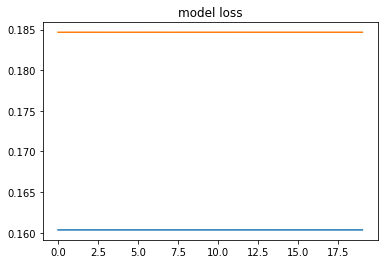

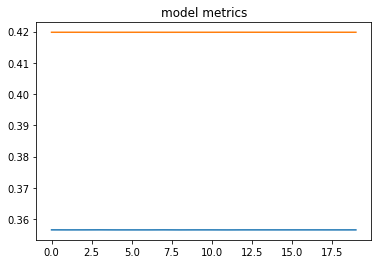

In [63]:
metok = len(list(history.history.keys()))//2

plt.plot(history.history[list(history.history.keys())[0]])
plt.plot(history.history[list(history.history.keys())[metok]])
plt.title('model loss')
plt.show()
for i in range(metok-1):
  plt.plot(history.history[list(history.history.keys())[i+1]])
  plt.plot(history.history[list(history.history.keys())[i+1+metok]])
  plt.title('model metrics')
  plt.show()

In [64]:
from keras.models import load_model
model = load_model('model_fx.h5')

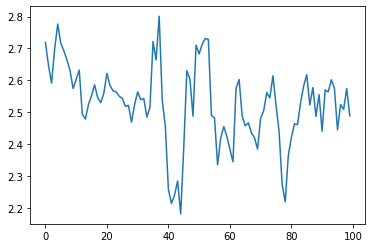

In [65]:
ttt = 100
val_predict = model.predict(X_val[ttt:ttt+massiv_blok])
val_original = Y_val[ttt:ttt+massiv_blok]
plt.plot(val_predict[:,0] - val_original)

In [66]:
val_predict

array([[0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.05382442],
       [0.053

In [67]:
val_original

array([-2.66490765, -2.59313984, -2.53720317, -2.64379947, -2.72295515,
       -2.66279683, -2.63852243, -2.61002639, -2.57730871, -2.52031662,
       -2.54881266, -2.57836412, -2.44010554, -2.42427441, -2.46965699,
       -2.49815303, -2.53192612, -2.49182058, -2.47598945, -2.5055409 ,
       -2.56781003, -2.5298153 , -2.51292876, -2.50976253, -2.49604222,
       -2.48970976, -2.46437995, -2.46754617, -2.41477573, -2.46965699,
       -2.50976253, -2.48548813, -2.48865435, -2.43060686, -2.46121372,
       -2.66807388, -2.61002639, -2.74722955, -2.48443272, -2.40211082,
       -2.20369393, -2.15936675, -2.18575198, -2.23007916, -2.12664908,
       -2.33562005, -2.5762533 , -2.54986807, -2.43377309, -2.65646438,
       -2.62902375, -2.65963061, -2.67757256, -2.67440633, -2.43588391,
       -2.42744063, -2.28073879, -2.36411609, -2.40105541, -2.37044855,
       -2.33034301, -2.29023747, -2.52031662, -2.54881266, -2.43377309,
       -2.40316623, -2.41266491, -2.38100264, -2.36622691, -2.33